In [ ]:
import numpy as np
import matplotlib.pyplot as plt




import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR

import torchvision
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset


import os
import os.path

from torchsummary import summary

import random
print(torch.__version__)
print(torchvision.__version__)


import scipy.io


2.2.1+cu121
0.17.1+cu121


In [ ]:
!unzip "Data.zip"

Archive:  Data.zip
  inflating: Data_1.mat              
  inflating: Data_10.mat             
  inflating: Data_11.mat             
  inflating: Data_12.mat             
  inflating: Data_13.mat             
  inflating: Data_14.mat             
  inflating: Data_15.mat             
  inflating: Data_16.mat             
  inflating: Data_17.mat             
  inflating: Data_18.mat             
  inflating: Data_19.mat             
  inflating: Data_2.mat              
  inflating: Data_20.mat             
  inflating: Data_21.mat             
  inflating: Data_22.mat             
  inflating: Data_23.mat             
  inflating: Data_24.mat             
  inflating: Data_25.mat             
  inflating: Data_26.mat             
  inflating: Data_27.mat             
  inflating: Data_28.mat             
  inflating: Data_29.mat             
  inflating: Data_3.mat              
  inflating: Data_30.mat             
  inflating: Data_31.mat             
  inflating: Data_32.mat       

In [ ]:
data1 = scipy.io.loadmat('Data_1.mat')
data2 = scipy.io.loadmat('Data_2.mat')
data3 = scipy.io.loadmat('Data_3.mat')
data4 = scipy.io.loadmat('Data_4.mat')
data5 = scipy.io.loadmat('Data_5.mat')
data6 = scipy.io.loadmat('Data_6.mat')
data7 = scipy.io.loadmat('Data_7.mat')
data8 = scipy.io.loadmat('Data_8.mat')
data9 = scipy.io.loadmat('Data_9.mat')
data10 = scipy.io.loadmat('Data_10.mat')
data11 = scipy.io.loadmat('Data_11.mat')
data12 = scipy.io.loadmat('Data_12.mat')
data13 = scipy.io.loadmat('Data_13.mat')
data14 = scipy.io.loadmat('Data_14.mat')
data15 = scipy.io.loadmat('Data_15.mat')
data16 = scipy.io.loadmat('Data_16.mat')
data17 = scipy.io.loadmat('Data_17.mat')
data18 = scipy.io.loadmat('Data_18.mat')
data19 = scipy.io.loadmat('Data_19.mat')
data20 = scipy.io.loadmat('Data_20.mat')
data21 = scipy.io.loadmat('Data_21.mat')
data22 = scipy.io.loadmat('Data_22.mat')
data23 = scipy.io.loadmat('Data_23.mat')
data24 = scipy.io.loadmat('Data_24.mat')
data25 = scipy.io.loadmat('Data_25.mat')
data26 = scipy.io.loadmat('Data_26.mat')
data27 = scipy.io.loadmat('Data_27.mat')
data28 = scipy.io.loadmat('Data_28.mat')
data29 = scipy.io.loadmat('Data_29.mat')
data30 = scipy.io.loadmat('Data_30.mat')
data31 = scipy.io.loadmat('Data_31.mat')
data32 = scipy.io.loadmat('Data_32.mat')
data33 = scipy.io.loadmat('Data_33.mat')
data34 = scipy.io.loadmat('Data_34.mat')
data35 = scipy.io.loadmat('Data_35.mat')
data36 = scipy.io.loadmat('Data_36.mat')
data37 = scipy.io.loadmat('Data_37.mat')
data38 = scipy.io.loadmat('Data_38.mat')
data39 = scipy.io.loadmat('Data_39.mat')
data40 = scipy.io.loadmat('Data_40.mat')
data41 = scipy.io.loadmat('Data_41.mat')
data42 = scipy.io.loadmat('Data_42.mat')
data43 = scipy.io.loadmat('Data_43.mat')
data44 = scipy.io.loadmat('Data_44.mat')
data45 = scipy.io.loadmat('Data_45.mat')
data46 = scipy.io.loadmat('Data_46.mat')
data47 = scipy.io.loadmat('Data_47.mat')
data48 = scipy.io.loadmat('Data_48.mat')
data49 = scipy.io.loadmat('Data_49.mat')
data50 = scipy.io.loadmat('Data_50.mat')

In [ ]:
x_train_1=data1['Data'][1:,1].reshape(1,-1)
y_train_1=data1['Data'][1:,0].reshape(1,-1)
x_train_2=data2['Data'][1:,1].reshape(1,-1)
y_train_2=data2['Data'][1:,0].reshape(1,-1)
x_train_3=data3['Data'][1:,1].reshape(1,-1)
y_train_3=data3['Data'][1:,0].reshape(1,-1)
x_train_4=data4['Data'][1:,1].reshape(1,-1)
y_train_4=data4['Data'][1:,0].reshape(1,-1)
x_train_5=data5['Data'][1:,1].reshape(1,-1)
y_train_5=data5['Data'][1:,0].reshape(1,-1)
x_train_6=data6['Data'][1:,1].reshape(1,-1)
y_train_6=data6['Data'][1:,0].reshape(1,-1)
x_train_7=data7['Data'][1:,1].reshape(1,-1)
y_train_7=data7['Data'][1:,0].reshape(1,-1)
x_train_8=data8['Data'][1:,1].reshape(1,-1)
y_train_8=data8['Data'][1:,0].reshape(1,-1)
x_train_9=data9['Data'][1:,1].reshape(1,-1)
y_train_9=data9['Data'][1:,0].reshape(1,-1)
x_train_10=data10['Data'][1:,1].reshape(1,-1)
y_train_10=data10['Data'][1:,0].reshape(1,-1)
x_train_11=data11['Data'][1:,1].reshape(1,-1)
y_train_11=data11['Data'][1:,0].reshape(1,-1)
x_train_12=data12['Data'][1:,1].reshape(1,-1)
y_train_12=data12['Data'][1:,0].reshape(1,-1)
x_train_13=data13['Data'][1:,1].reshape(1,-1)
y_train_13=data13['Data'][1:,0].reshape(1,-1)
x_train_14=data14['Data'][1:,1].reshape(1,-1)
y_train_14=data14['Data'][1:,0].reshape(1,-1)
x_train_15=data15['Data'][1:,1].reshape(1,-1)
y_train_15=data15['Data'][1:,0].reshape(1,-1)
x_train_16=data16['Data'][1:,1].reshape(1,-1)
y_train_16=data16['Data'][1:,0].reshape(1,-1)
x_train_17=data17['Data'][1:,1].reshape(1,-1)
y_train_17=data17['Data'][1:,0].reshape(1,-1)
x_train_18=data18['Data'][1:,1].reshape(1,-1)
y_train_18=data18['Data'][1:,0].reshape(1,-1)
x_train_19=data19['Data'][1:,1].reshape(1,-1)
y_train_19=data19['Data'][1:,0].reshape(1,-1)
x_train_20=data20['Data'][1:,1].reshape(1,-1)
y_train_20=data20['Data'][1:,0].reshape(1,-1)
x_train_21=data21['Data'][1:,1].reshape(1,-1)
y_train_21=data21['Data'][1:,0].reshape(1,-1)
x_train_22=data22['Data'][1:,1].reshape(1,-1)
y_train_22=data22['Data'][1:,0].reshape(1,-1)
x_train_23=data23['Data'][1:,1].reshape(1,-1)
y_train_23=data23['Data'][1:,0].reshape(1,-1)
x_train_24=data24['Data'][1:,1].reshape(1,-1)
y_train_24=data24['Data'][1:,0].reshape(1,-1)
x_train_25=data25['Data'][1:,1].reshape(1,-1)
y_train_25=data25['Data'][1:,0].reshape(1,-1)
x_train_26=data26['Data'][1:,1].reshape(1,-1)
y_train_26=data26['Data'][1:,0].reshape(1,-1)
x_train_27=data27['Data'][1:,1].reshape(1,-1)
y_train_27=data27['Data'][1:,0].reshape(1,-1)
x_train_28=data28['Data'][1:,1].reshape(1,-1)
y_train_28=data28['Data'][1:,0].reshape(1,-1)
x_train_29=data29['Data'][1:,1].reshape(1,-1)
y_train_29=data29['Data'][1:,0].reshape(1,-1)
x_train_30=data30['Data'][1:,1].reshape(1,-1)
y_train_30=data30['Data'][1:,0].reshape(1,-1)
x_train_31=data31['Data'][1:,1].reshape(1,-1)
y_train_31=data31['Data'][1:,0].reshape(1,-1)
x_train_32=data32['Data'][1:,1].reshape(1,-1)
y_train_32=data32['Data'][1:,0].reshape(1,-1)
x_train_33=data33['Data'][1:,1].reshape(1,-1)
y_train_33=data33['Data'][1:,0].reshape(1,-1)
x_train_34=data34['Data'][1:,1].reshape(1,-1)
y_train_34=data34['Data'][1:,0].reshape(1,-1)
x_train_35=data35['Data'][1:,1].reshape(1,-1)
y_train_35=data35['Data'][1:,0].reshape(1,-1)
x_train_36=data36['Data'][1:,1].reshape(1,-1)
y_train_36=data36['Data'][1:,0].reshape(1,-1)
x_train_37=data37['Data'][1:,1].reshape(1,-1)
y_train_37=data37['Data'][1:,0].reshape(1,-1)
x_train_38=data38['Data'][1:,1].reshape(1,-1)
y_train_38=data38['Data'][1:,0].reshape(1,-1)
x_train_39=data39['Data'][1:,1].reshape(1,-1)
y_train_39=data39['Data'][1:,0].reshape(1,-1)
x_train_40=data40['Data'][1:,1].reshape(1,-1)
y_train_40=data40['Data'][1:,0].reshape(1,-1)
x_train_41=data41['Data'][1:,1].reshape(1,-1)
y_train_41=data41['Data'][1:,0].reshape(1,-1)
x_train_42=data42['Data'][1:,1].reshape(1,-1)
y_train_42=data42['Data'][1:,0].reshape(1,-1)
x_train_43=data43['Data'][1:,1].reshape(1,-1)
y_train_43=data43['Data'][1:,0].reshape(1,-1)
x_train_44=data44['Data'][1:,1].reshape(1,-1)
y_train_44=data44['Data'][1:,0].reshape(1,-1)
x_train_45=data45['Data'][1:,1].reshape(1,-1)
y_train_45=data45['Data'][1:,0].reshape(1,-1)
x_train_46=data46['Data'][1:,1].reshape(1,-1)
y_train_46=data46['Data'][1:,0].reshape(1,-1)
x_train_47=data47['Data'][1:,1].reshape(1,-1)
y_train_47=data47['Data'][1:,0].reshape(1,-1)
x_train_48=data48['Data'][1:,1].reshape(1,-1)
y_train_48=data48['Data'][1:,0].reshape(1,-1)
x_train_49=data49['Data'][1:,1].reshape(1,-1)
y_train_49=data49['Data'][1:,0].reshape(1,-1)
x_train_50=data50['Data'][1:,1].reshape(1,-1)
y_train_50=data50['Data'][1:,0].reshape(1,-1)

print(x_train_1.shape)

(1, 20000)


In [ ]:
x = np.concatenate((x_train_1,x_train_2,x_train_3,x_train_4,x_train_5,x_train_6,x_train_7,x_train_8,x_train_9,x_train_10,x_train_11,x_train_12,x_train_13,x_train_14,x_train_15,x_train_16,x_train_17,x_train_18,x_train_19,x_train_20,x_train_21,x_train_22,x_train_23,x_train_24,x_train_25,x_train_26,x_train_27,x_train_28,x_train_29,x_train_30,x_train_31,x_train_32,x_train_33,x_train_34,x_train_35,x_train_36,x_train_37,x_train_38,x_train_39,x_train_40,x_train_41,x_train_42,x_train_43,x_train_44,x_train_45,x_train_46,x_train_47,x_train_48,x_train_49,x_train_50), axis=1)
y = np.concatenate((y_train_1,y_train_2,y_train_3,y_train_4,y_train_5,y_train_6,y_train_7,y_train_8,y_train_9,y_train_10,y_train_11,y_train_12,y_train_13,y_train_14,y_train_15,y_train_16,y_train_17,y_train_18,y_train_19,y_train_20,y_train_21,y_train_22,y_train_23,y_train_24,y_train_25,y_train_26,y_train_27,y_train_28,y_train_29,y_train_30,y_train_31,y_train_32,y_train_33,y_train_34,y_train_35,y_train_36,y_train_37,y_train_38,y_train_39,y_train_40,y_train_41,y_train_42,y_train_43,y_train_44,y_train_45,y_train_46,y_train_47,y_train_48,y_train_49,y_train_50), axis=1)
print(x.shape)
print(y.shape)

(1, 1000000)
(1, 1000000)


In [ ]:
n=500
sottocampionix,sottocampioniy=[],[]
for i in range(0,len(x[0]), n):
    sottocampionix.append(x[:,i:i+n])
    sottocampioniy.append(y[:,i:i+n])
x_train=np.array(sottocampionix)
y_train=np.array(sottocampioniy)
print(x_train.shape)
print(y_train.shape)

(2000, 1, 500)
(2000, 1, 500)


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x,y_train,y = train_test_split(x_train,y_train,train_size=0.8, shuffle=True, random_state=1234)


mediax=x_train.mean()
deviazionex=x_train.std()

mediay=y_train.mean()
deviazioney=y_train.std()

x_train= (x_train-mediax)/deviazionex
x=(x-mediax)/deviazionex

y_train= (y_train-mediay)/deviazioney
y=(y-mediay)/deviazioney

x_vali,x_test,y_vali,y_test = train_test_split(x,y,train_size=0.9, shuffle=True, random_state=1234)

print(x_train.shape)
print(y_train.shape)
print(x_vali.shape)
print(y_vali.shape)

(1600, 1, 500)
(1600, 1, 500)
(360, 1, 500)
(360, 1, 500)


In [ ]:
def accuracy (true, signal):
  fedelty=0
  for i in range (len(true)) :
    error =np.abs(true[i][0,10:n-10] - signal[i][0,10:n-10]).sum()/np.abs(true[i][0,10:n-10]).sum()
    fedelty += (1-error)*100
  return fedelty/len(true)

In [ ]:
def accuracytensor (true, signal, batch):
  fedelty=0
  for i in range (batch) :
    error =torch.abs(true[i][0,10:n-10] - signal[i][0,10:n-10]).sum()/torch.abs(true[i][0,10:n-10]).sum()
    fedelty += (1-error)*100
  return (fedelty/batch).item()

In [ ]:

print (accuracy(y_train,x_train))
print (accuracy(y_vali,x_vali))
print (accuracy(y_test,x_test))

88.11531742355056
86.48659215397537
90.59130781795793


# Funzione che predice il background in funzione del modello e del dataloader, sarà utile a calcolare le prestazioni del modello sulle features degli spettri


# Funzione che costruisce il dataset prendendo in input x/y, serve per costruire i dataloaders


In [ ]:
class set(Dataset):
  def __init__(self,features,targets):
    self.x=torch.from_numpy(features).float()
    self.y=torch.from_numpy(targets).float()


    print(features.shape[0])
    self.n_samples = features.shape[0]

    self.x=(self.x).view(targets.shape,-1)

    self.y=(self.y).view(targets.shape,-1)
    print(self.y.shape)

  def __getitem__(self, index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.n_samples

# Visualizzazione dati

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1600, 1, 500)
(1600, 1, 500)
(40, 1, 500)
(40, 1, 500)


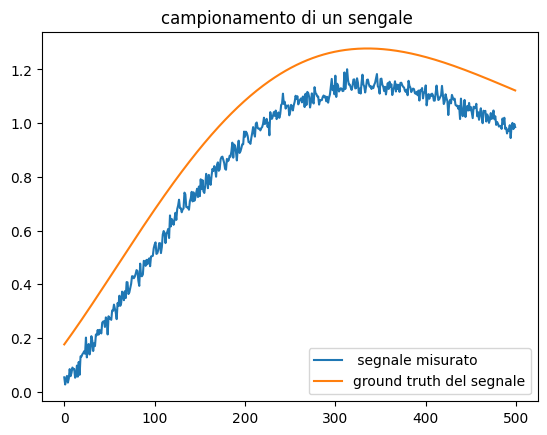

In [ ]:
r=random.randint(0, len(x_train))

plt.plot(x_train[r][0,:], label=' segnale misurato ')
plt.plot(y_train[r][0,:], label='ground truth del segnale')

plt.title('campionamento di un sengale ')

plt.legend()

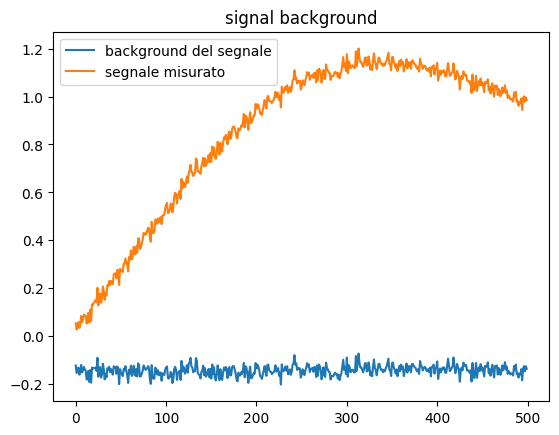

In [ ]:
plt.plot(x_train[r][0,:]-y_train[r][0,:], label='background del segnale')
plt.plot(x_train[r][0,:], label='segnale misurato')
plt.title('signal background')
plt.legend()

In [ ]:
print('train_noised_max:',x_train.max())
print('train_noised_min:',x_train.min())
print()
print('train_denoised_max:',y_train.max())
print('train_denoised_min:',y_train.min())
print()
print('test_noised_max:',x_test.max())
print('test_noised_min:',x_test.min())
print()
print('test_denoised_max:',y_test.max())
print('test_denoised_min:',y_test.min())


train_noised_max: 2.7793118452653975
train_noised_min: -2.833753141320964

train_denoised_max: 2.686403332223785
train_denoised_min: -2.7690970887165043

test_noised_max: 2.3040148115433143
test_noised_min: -2.4186958149944107

test_denoised_max: 2.2944734154124884
test_denoised_min: -2.4715161691742193


In [ ]:
dataset_train= set(features=x_train,targets=y_train)
dataset_vali= set(features=x_vali,targets=y_vali)
dataset_test= set(features=x_test,targets=y_test)

1600
torch.Size([1600, 1, 500])
360
torch.Size([360, 1, 500])
40
torch.Size([40, 1, 500])


In [ ]:
accuracytensor(dataset_train.y,dataset_train.x,1600)

88.11524200439453

# Modello DnCNN

In [ ]:
class DnCNN(nn.Module):
  def __init__(self, depth=17, n_channels=64, image_channels=1,  kernel_size=3, drop=0.1):
    super(DnCNN, self).__init__()
    padding = 1
    layers = []

    layers.append(nn.Conv1d(in_channels=image_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=True))
    layers.append(nn.ReLU(inplace=False)) # il true sostituisce direattamente l'input con l'output
    for _ in range(depth-2):
            layers.append(nn.Conv1d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=True))
            layers.append(nn.BatchNorm1d(n_channels, eps=0.0001, momentum=0.95))
            layers.append(nn.ReLU(inplace=False))
            layers.append(nn.Dropout(drop,inplace=False))
    layers.append(nn.Conv1d(in_channels=n_channels, out_channels=image_channels, kernel_size=kernel_size, padding=padding, bias=True))


    self.fc = nn.Linear(n, n)
    self.dncnn = nn.Sequential(*layers)
    # self.conv_res = nn.Conv1d(in_channels=image_channels, out_channels=image_channels, kernel_size=1, padding='same')


  def forward(self, x):
    # y = self.conv_res(x)
    out = self.dncnn(x)
    # out = self.maxpool1d(out)
    # out = torch.flatten(out, 1)
    # x = self.flat(x)
    # out = self.flat(out)
    # out = self.fc(out)
    # out = out+self.b
    # out =(out + x )
    return out


In [ ]:
# vado a printare il modell
model = DnCNN()
print(model)


if torch.cuda.is_available():
  summary(model.cuda(), input_size=(1,n))
else:
  summary(model, input_size=(1,n))

DnCNN(
  (fc): Linear(in_features=500, out_features=500, bias=True)
  (dncnn): Sequential(
    (0): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): BatchNorm1d(64, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): BatchNorm1d(64, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Dropout(p=0.1, inplace=False)
    (10): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (11): BatchNorm1d(64, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): Dropout(p=0.1, inplace=False)
    (14): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (15): BatchNorm1d(64, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
    (16): ReLU

In [ ]:
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(0))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Numero di GPU disponibili:  1
Tesla T4
Computation device: cuda



# Definizione della metrica, loss e impostazione dell'ottimizzatore usando uno schedular learning rate

In [ ]:
def train (model, criterion ,lr , batch, d, p, filters, train_dl , vali_dl, ultimate_score):
  best_score = 0
  best_params = None
  hist_vloss = []
  hist_tloss = []
  hist_acc_sti = []
  hist_acc_pre = []
  loss_func = criterion
  opt = optim.Adam(model.parameters(), lr=lr)

  epochs = 50
  # loop sulle epoche
  for epoch in range(epochs):





    # training step
    model.train()
    train_loss = 0
    counter = 0

    for xb, yb in train_dl:
        counter += 1
        xb=xb.to(device)
        yb=yb.to(device)

        # preparazione dei dati
        xb = xb.view(batch,1,-1)
        yb=yb.view(batch,1,-1)

        #predizione del modello
        pred = model(xb)
        # pred = pred.view(batch,1,-1)

        # calcolo loss e metrica
        loss = loss_func(pred,yb)



        # aggiorno la loss e metrica totale
        train_loss += loss.item()


        # backpropagation
        opt.zero_grad()
        loss.backward()
        opt.step()


    train_loss /= counter
    hist_tloss.append(train_loss)


    # validation step
    model.eval()
    vali_loss = 0
    acc_sti_val = 0
    acc_pre_val = 0
    counter = 0

    with torch.no_grad():
      for xb, yb in vali_dl:
        counter += 1
        xb=xb.to(device)
        yb=yb.to(device)


        # preparazione dati
        xb = xb.view(batch,1,-1)
        yb = yb.view(batch,1,-1)

        pred = model(xb)


        # calcolo loss e metrica
        vloss = loss_func(pred,yb)



        acc_sti = accuracytensor(yb, xb , batch)
        acc_pre = accuracytensor(yb, pred , batch)

        acc_sti_val += acc_sti
        acc_pre_val += acc_pre
        vali_loss += vloss.item()

    acc_sti_val /= counter
    acc_pre_val /= counter
    vali_loss /= counter

    hist_acc_sti.append(acc_sti_val)
    hist_acc_pre.append(acc_pre_val)
    hist_vloss.append(vali_loss)
    #Salvo il modello e gli iperparametri migliori che massimizzano l'accuracy per ogni ciclo di addestramento

    if acc_pre_val > best_score:
      best_score = acc_pre_val
      best_vloss = vali_loss

      # Salvo il modello migliore quando l'accuracy è la migliore rispetto a tutte quelle precedenti
      if best_score > ultimate_score:
        ultimate_score = best_score
        best_vloss = vali_loss
        torch.save({ 'model1' : model,

                        'model_state_dict': model.state_dict(),

                        }, 'best_model.pth')

      best_params = {'learning_rate': lr,'criterion': criterion, 'batch_size': batch, 'n_filters': filters,'depth': d, 'dropout': p }

  return best_score, best_vloss, hist_vloss, hist_tloss, best_params , hist_acc_sti , hist_acc_pre

In [ ]:
# Hyperparameters
# learning_rate = [0.001, 0.01]
# batch_size = [32, 16]
# dropout = [0.5 , 0 ]
filters = [32, 64,128]
# criterion = [nn.L1Loss(),nn.MSELoss()]
depth = [8,10, 5]

In [ ]:
bs= 32
lr= 0.001
p= 0.1

In [ ]:
# Hyperparameters
learning_rate = [0.001]
batch_size = [32]
dropout = [ 0 ]
filters = [256]
# criterion = [nn.MSELoss()]
depth = [15]

In [ ]:
# Hyperparameter tuning

best_gra_tloss= []
best_gra_vloss= []

best_gra_acc_sti=[]
best_gra_acc_pre=[]

top_ten =[]
best_results=[]

ultimate_score= 0

#Vengono testate le diverse configurazione di iperparametri per 5 diverse configurazioni di parametri TB
for fl in filters:
  #  for lr in learning_rate:
    # for bs in batch_size:
      # for cr in criterion:
        for d in depth:
          # for p in dropout:
            for i in range(2):
              # preparazione dei dati
              train_dl= DataLoader(dataset=dataset_train, batch_size=bs, shuffle=True, drop_last= True)
              vali_dl= DataLoader(dataset=dataset_vali, batch_size=bs, shuffle=True, drop_last= True)
              #dichiarazione del modello
              model = DnCNN(d,fl,1,3,p)
              loss_func = nn.L1Loss()
              model.to(device)



              # Train and evaluate the model
              results = train(model, loss_func , lr , bs , d, p, fl, train_dl , vali_dl, ultimate_score)

              #salva tutti i migliori risultati dell'accuracy in una lista
              top_ten.append(results[0])


              #il migliore tra tutti viene utilizzato per salvare il modello migliore in assoluto
              ultimate_score = min(top_ten)
              print({"best_loss_stimata" : results[0], 'best_params': results[4] })

              #  vengono salvati tutti i migliori risultati con i relativi iperparametri
              best_results.append({"best_loss" : results[0], 'best_tloss': results[1] ,'params': results[4] })

              #vengono salvati gli storici per dei miglior risultati
              best_gra_vloss.append( results[2])
              best_gra_tloss.append( results[3])
              best_gra_acc_sti.append( results[5])
              best_gra_acc_pre.append( results[6])

#viene selezionato il modello migliore tra tutti i modelli migliori
max_accuracy = max(top_ten)
indice_max =  top_ten.index(max_accuracy)
print("il migliore in assoluto:", best_results[indice_max])

{'best_loss_stimata': 84.2983100197532, 'best_params': {'learning_rate': 0.001, 'criterion': L1Loss(), 'batch_size': 32, 'n_filters': 256, 'depth': 15, 'dropout': 0.1}}
{'best_loss_stimata': 84.63581709428267, 'best_params': {'learning_rate': 0.001, 'criterion': L1Loss(), 'batch_size': 32, 'n_filters': 256, 'depth': 15, 'dropout': 0.1}}
il migliore in assoluto: {'best_loss': 84.63581709428267, 'best_tloss': 0.08240002325989983, 'params': {'learning_rate': 0.001, 'criterion': L1Loss(), 'batch_size': 32, 'n_filters': 256, 'depth': 15, 'dropout': 0.1}}


In [ ]:
print(accuracy(dataset_train.y,dataset_train.x))

tensor(87.9299)


# TEST

# Ricostruzione della baseline

In [ ]:
model_data = torch.load('./best_model.pth')

model=model_data['model1']

In [ ]:
model.to(torch.device('cpu'))

DnCNN(
  (fc): Linear(in_features=500, out_features=500, bias=True)
  (dncnn): Sequential(
    (0): Conv1d(1, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): BatchNorm1d(256, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): BatchNorm1d(256, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Dropout(p=0.1, inplace=False)
    (10): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (11): BatchNorm1d(256, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): Dropout(p=0.1, inplace=False)
    (14): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (15): BatchNorm1d(256, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
 

In [ ]:
pred = (model(dataset_test.x))
print(pred.shape)

torch.Size([40, 1, 500])


In [ ]:
pred=pred.detach().numpy()
print(pred.shape)

(40, 1, 500)


In [ ]:
print(accuracy(dataset_test.y,dataset_test.x))
print(accuracy(dataset_test.y,pred))

tensor(90.4331)
tensor(86.7629)


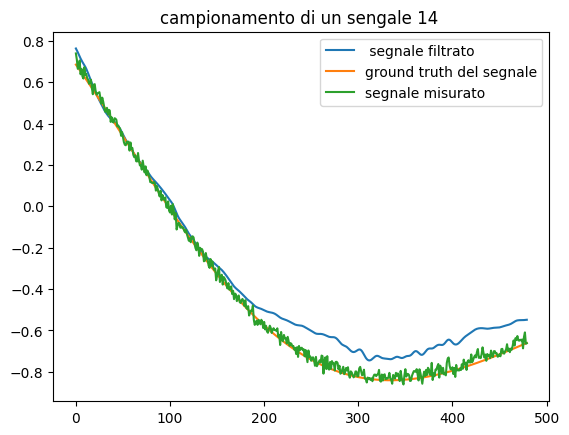

In [ ]:
r=random.randint(0, 19)

plt.plot(pred[r][0,10:n-10], label=' segnale filtrato ')
plt.plot(dataset_test.y[r][0,10:n-10], label='ground truth del segnale')
plt.plot(dataset_test.x[r][0,10:n-10], label='segnale misurato')
plt.title('campionamento di un sengale %d ' %r)

plt.legend()

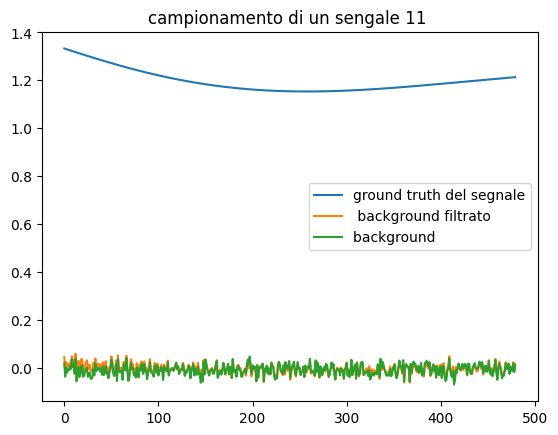

In [ ]:
r=random.randint(0, 19)


plt.plot(dataset_test.y[r][0,10:n-10], label='ground truth del segnale')
plt.plot(dataset_test.x[r][0,10:n-10]-pred[r][0,10:n-10], label=' background filtrato ')
plt.plot(dataset_test.x[r][0,10:n-10]-dataset_test.y[r][0,10:n-10], label='background ')
plt.title('campionamento di un sengale %d ' %r)

plt.legend()

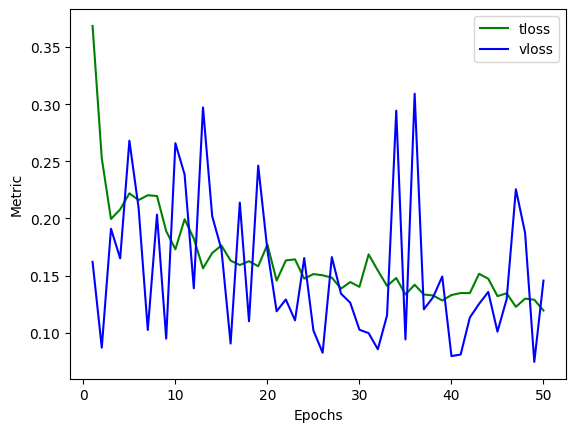

In [ ]:
plt.plot(range(1,len(best_gra_tloss[indice_max])+1),best_gra_tloss[indice_max], color='green', linestyle='-', label='tloss')
plt.plot(range(1,len( best_gra_vloss[indice_max])+1),best_gra_vloss[indice_max], color='blue', linestyle='-', label='vloss')
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.legend()
plt.show()

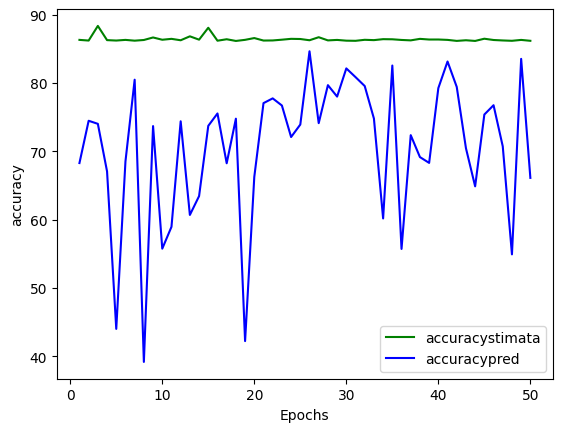

In [ ]:
plt.plot(range(1,len(best_gra_acc_sti[indice_max])+1),best_gra_acc_sti[indice_max], color='green', linestyle='-', label='accuracystimata')
plt.plot(range(1,len( best_gra_acc_pre[indice_max])+1),best_gra_acc_pre[indice_max], color='blue', linestyle='-', label='accuracypred')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()